In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Social_Network_Ads-Copy1.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x=data.iloc[:,2:4]
y=data.iloc[:,-1]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [5]:
x_scaled=scaler.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2)

## KNN

In [7]:
#first methos
np.sqrt(x_train.shape[0])

17.88854381999832

In [8]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=17)  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=17)

In [9]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

In [10]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(y_test, y_pred)  

In [11]:
print(cm)

[[44  3]
 [ 5 28]]


In [12]:
accuracy_score(y_test,y_pred)

0.9

In [13]:
#second method 
accuracy=[]
for i in range(1,26):
    classifier= KNeighborsClassifier(n_neighbors=i)  
    classifier.fit(x_train, y_train)
    y_pred= classifier.predict(x_test) 
    accuracy.append(accuracy_score(y_test,y_pred))

In [14]:
len(accuracy)

25

In [15]:
max(accuracy)

0.925

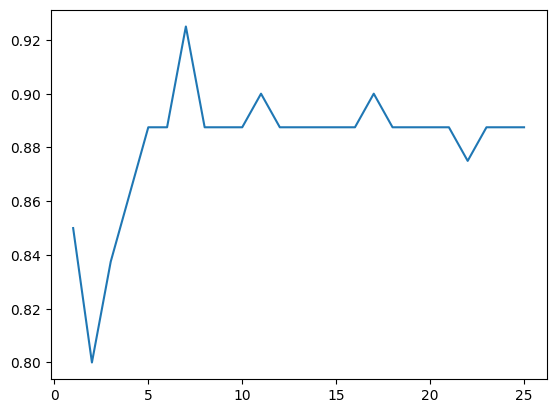

In [16]:
import matplotlib.pyplot as mtp
mtp.plot(range(1,26),accuracy)

In [19]:
# Effect of K on Training Error rate and Validation Error rate

error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    x=confusion_matrix(y_train,knn.predict(x_train))
    y=confusion_matrix(y_test,knn.predict(x_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

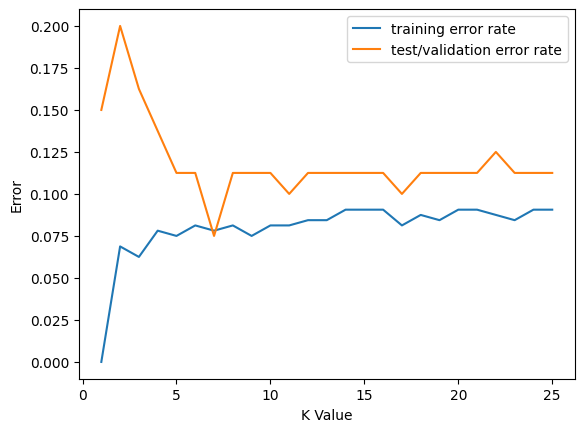

In [21]:
mtp.plot(range(1,26),error_train,label='training error rate')
mtp.plot(range(1,26),error_test,label='test/validation error rate')
mtp.xlabel('K Value')
mtp.ylabel('Error')
mtp.legend()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17108\2563123099.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


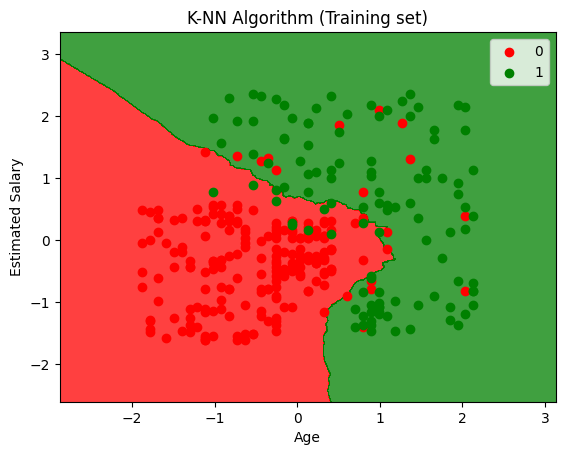

In [22]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17108\713366775.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


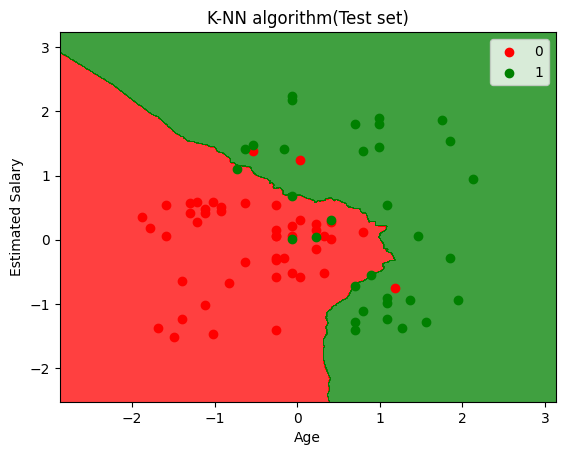

In [23]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN algorithm(Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show() 

In [24]:
#make a prediction function

In [25]:
def predict_output():
    age=int(input("Enter the age: "))
    salary=int(input("Enter the salary: "))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    
    if classifier.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [26]:
predict_output()

Enter the age12
Enter the salary23000000


C:\Users\ASUS\anaconda3\envs\notebook-6.5.4\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Will purchase'